In [2]:
#lof 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(1)
x,_=make_blobs(n_samples=200,centers=1,cluster_std=0.3,center_box=(10,10))
model=LocalOutlierFactor(n_neighbors=20)

In [5]:
y_pred=model.fit_predict(x)
lof_scores=model.negative_outlier_factor_

In [6]:
thresh=np.quantile(lof_scores,0.03)
print('Threshold:',thresh)

Threshold: -1.819148296090704


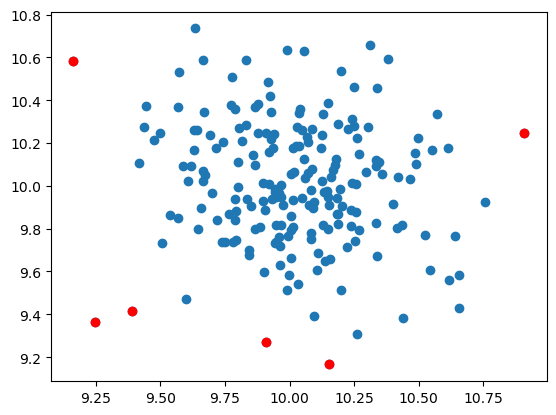

In [7]:
outlier_indices=np.where(lof_scores<=thresh)
outlier_values=x[outlier_indices]
plt.scatter(x[:,0],x[:,1])
plt.scatter(outlier_values[:,0],outlier_values[:,1],color='r')
plt.show()

In [10]:
# dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [11]:
x=pd.read_csv('studmark.csv')
x=x.drop('id',axis=1)
x.fillna(method='ffill',inplace=True)
x.head()

,s1mark,s2mark,s3mark,s4mark,s5mark
0,45,65,56,48,95
1,0,54,36,48,100
2,48,56,47,74,33
3,65,45,96,44,55
4,14,2,57,84,99


In [13]:
scaler=StandardScaler()
xs=scaler.fit_transform(x)
xn=normalize(xs)
xn=pd.DataFrame(xn)
xn.head()

,0,1,2,3,4
0,-0.117281,0.376772,-0.383279,-0.071247,0.832051
1,-0.659825,0.017664,-0.535881,-0.040083,0.524923
2,-0.049595,0.099579,-0.675990,0.577454,-0.444082
3,0.397013,-0.283428,0.852123,-0.187584,0.027346
4,-0.383413,-0.727066,-0.161106,0.355846,0.414474


In [14]:
pca=PCA(n_components=2)
xp=pca.fit_transform(xn)
xp=pd.DataFrame(xp)
xp.columns=['p1','p2']
xp.head()

,p1,p2
0,0.655397,-0.416902
1,0.990334,-0.324421
2,0.401782,0.238666
3,-0.606574,0.269612
4,0.846508,0.429600


ValueError: not enough values to unpack (expected 4, got 2)

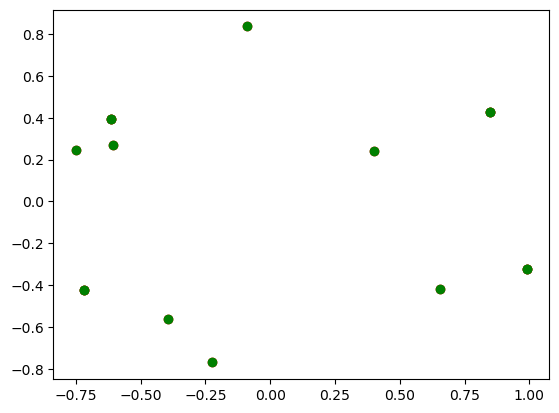

In [19]:
db=DBSCAN(eps=0.0375,min_samples=3).fit(xp)
labels=db.labels_
colors={}
colors[0],colors[1],colors[2],colors[-1]='r','g','b','k'
cvec=[colors[label] for label in labels]
r,g,b,k=plt.scatter(xp['p1'],xp['p2'],color='r'),plt.scatter(xp['p1'],xp['p2'],color='g'),
plt.scatter(xp['p1'],xp['p2'],color='b'),plt.scatter(xp['p1'],xp['p2'],color='k')
# plt.figure(figsize=(7,7))
plt.scatter(xp['p1'],xp['p2'],c=cvec)
plt.legend((r,g,b,k),('label 0','label 1','label 2','label -1'))
plt.show()

In [21]:
# kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [22]:
iris=pd.read_csv('iris.csv')
x=iris.iloc[:,[0,1,2,3]].values

In [24]:
# iris.info()
iris[0:4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [25]:
iris_outcome=pd.crosstab(index=iris['Species'],columns='count')
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [26]:
setosa=iris.loc[iris["Species"]=='Iris-setosa']
virginica=iris.loc[iris["Species"]=='Iris-virginica']
versi=iris.loc[iris["Species"]=='Iris-versicolor']

In [29]:
from sklearn.cluster import KMeans
s=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    s.append(kmeans.inertia_)

C:\Users\hmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\hmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


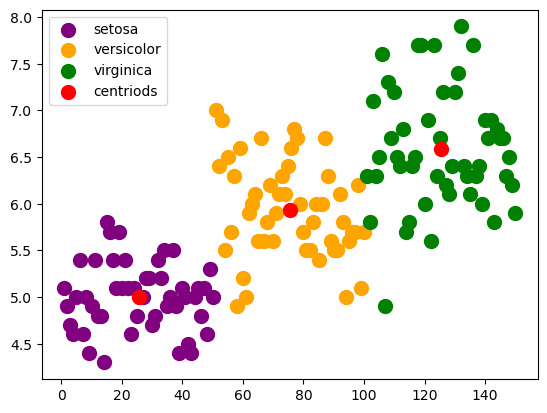

In [35]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='purple',label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='orange',label='versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='centriods')
plt.legend()

In [36]:
#decision tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
iris=load_iris()
x=iris.data
y=iris.target

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [39]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
predictions=model.predict(x_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.95      0.95        21
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [42]:
confusion_matrix(y_test,predictions)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 19]], dtype=int64)

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=None,class_names=['0','1','2'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision.png')
Image(graph.create_png())

In [7]:
# naive bayes
import pandas as pd
data=pd.DataFrame()
data['Gender']=['male','male','male','male','female','female','female','female']
data['Height']=[6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight']=[180,190,170,165,100,150,130,150]
data['Foot_size']=[12,11,12,10,6,8,7,9]
data.head()

,Gender,Height,Weight,Foot_size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6


In [8]:
person=pd.DataFrame()
person['Height']=[6]
person['Weight']=[130]
person['Foot_size']=[8]
person

,Height,Weight,Foot_size
0,6,130,8


In [11]:
nomales=data['Gender'][data['Gender']=='male'].count()
nofemales=data['Gender'][data['Gender']=='fele'].count()
total_ppl=data['Gender'].count()
nomales
nofemales
total_ppl

8

In [12]:
pmales=nomales/total_ppl
pfemales=nofemales/total_ppl
pmales
pfemales

0.0

In [14]:
#find data_means and data variance by using groupby
data_means=data.groupby('Gender').mean()
data_variance=data.groupby('Gender').var()
data_means
data_variance

,Height,Weight,Foot_size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [15]:
# find mean and variance for all attributes of male
mhtmean=data_means['Height'][data_variance.index=='male'].values[0]
mwtmean=data_means['Weight'][data_variance.index=='male'].values[0]
mfsmean=data_means['Foot_size'][data_variance.index=='male'].values[0]
mhtmean
mwtmean
mfsmean

11.25

In [16]:
mhtvar=data_variance['Height'][data_variance.index=='male'].values[0]
mwtvar=data_variance['Weight'][data_variance.index=='male'].values[0]
mfsvar=data_variance['Foot_size'][data_variance.index=='male'].values[0]
mfsvar
mhtvar
mwtvar

122.91666666666667

In [17]:
fhtmean=data_means['Height'][data_variance.index=='female'].values[0]
fwtmean=data_means['Weight'][data_variance.index=='female'].values[0]
ffsmean=data_means['Foot_size'][data_variance.index=='female'].values[0]
fhtvar=data_variance['Height'][data_variance.index=='female'].values[0]
fwtvar=data_variance['Weight'][data_variance.index=='female'].values[0]
ffsvar=data_variance['Foot_size'][data_variance.index=='female'].values[0]

fwtmean
fhtmean
ffsmean
fhtvar
fwtvar
ffsvar

1.6666666666666667

In [18]:
def p_xgiveny(x,mean_y,var_y):
    p=1/(np.sqrt(2*np.pi*var_y))*np.exp((-(x-mean_y)**2)/(2*var_y))
    return p

In [20]:
pmales *\
p_xgiveny(person['Height'][0],mhtmean,mhtvar)*\
p_xgiveny(person['Weight'][0],mwtmean,mwtvar) * \
p_xgiveny(person['Foot_size'][0],mfsmean,mfsvar) 


6.197071843878078e-09

In [21]:
pfemales * \
p_xgiveny(person['Height'][0],fhtmean,fhtvar) * \
p_xgiveny(person['Weight'][0],fwtmean,fwtvar) * \
p_xgiveny(person['Foot_size'][0],ffsmean,ffsvar) 


0.0

In [22]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [27]:
y_pred=gnb.predict(X_test)

In [28]:
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy(in %):',metrics.accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [34]:
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))

Recall: 0.950


In [35]:
print('F1 Score: %.3f' % f1_score(y_test,y_pred,average='micro'))

F1 Score: 0.950


In [3]:
#fpgrowth
import pandas as pd
df=pd.read_csv('market.csv')
df.head(3)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.fillna(0,inplace=True)
df.head(3)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [5]:
transactions=[]
for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [7]:
transactions[0]

['burgers', 'meatballs', 'eggs', '0.0']

In [9]:
from apyori import apriori